In [29]:
import numpy as np #to read the file
import pandas as pd #for numerical computations
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
dataset = pd.read_csv('G:\\python\\python project\\HR_Data.csv')

In [31]:
#shape of Dataset
dataset.shape

(14999, 10)

In [32]:
#prints first 5 rows
dataset.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [33]:
#Renaming of dataset
dataset=dataset.rename(columns={'department':'Department'})
dataset=dataset.rename(columns={'average_montly_hours':'Average_Monthly_Hours'})
dataset=dataset.rename(columns={'satisfaction_level':'Satisfaction_Level'})
dataset=dataset.rename(columns={'last_evaluation':'Last_Evaluation'})
dataset=dataset.rename(columns={'time_spend_company':'Time_Spent_in_Company'})
dataset=dataset.rename(columns={'Work_accident':'Work_Accident'})
dataset=dataset.rename(columns={'left':'Left'})
dataset=dataset.rename(columns={'promotion_last_5years':'Promotion_Last_5Years'})
dataset=dataset.rename(columns={'salary':'Salary'})
dataset=dataset.rename(columns={'number_project':'Number_Project'})

In [34]:
#gives Summary of the Data
dataset.describe()

,Satisfaction_Level,Last_Evaluation,Number_Project,Average_Monthly_Hours,Time_Spent_in_Company,Work_Accident,Left,Promotion_Last_5Years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [35]:
#Gives feature names, type, entry counts, feature count, memory usage etc
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
Satisfaction_Level       14999 non-null float64
Last_Evaluation          14999 non-null float64
Number_Project           14999 non-null int64
Average_Monthly_Hours    14999 non-null int64
Time_Spent_in_Company    14999 non-null int64
Work_Accident            14999 non-null int64
Left                     14999 non-null int64
Promotion_Last_5Years    14999 non-null int64
Department               14999 non-null object
Salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [36]:
#lets see if there are any more columns with missing values
dataset.isnull().sum()

Satisfaction_Level       0
Last_Evaluation          0
Number_Project           0
Average_Monthly_Hours    0
Time_Spent_in_Company    0
Work_Accident            0
Left                     0
Promotion_Last_5Years    0
Department               0
Salary                   0
dtype: int64

In [57]:
#Encoding categorical data
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelEnc=LabelEncoder()

cat_vars=["Department","Salary","Work_Accident"]
for col in cat_vars:
    dataset[col]=labelEnc.fit_transform(dataset[col])

#after categorical encoding
X = dataset.iloc[:,[0,1,2,3,4,5,7,8,9]].values
onehotencoder = OneHotEncoder(categorical_features = [[5],[7],[8]])
X = onehotencoder.fit_transform(X).toarray()

Text(0.5,1,u'Correlation between features')

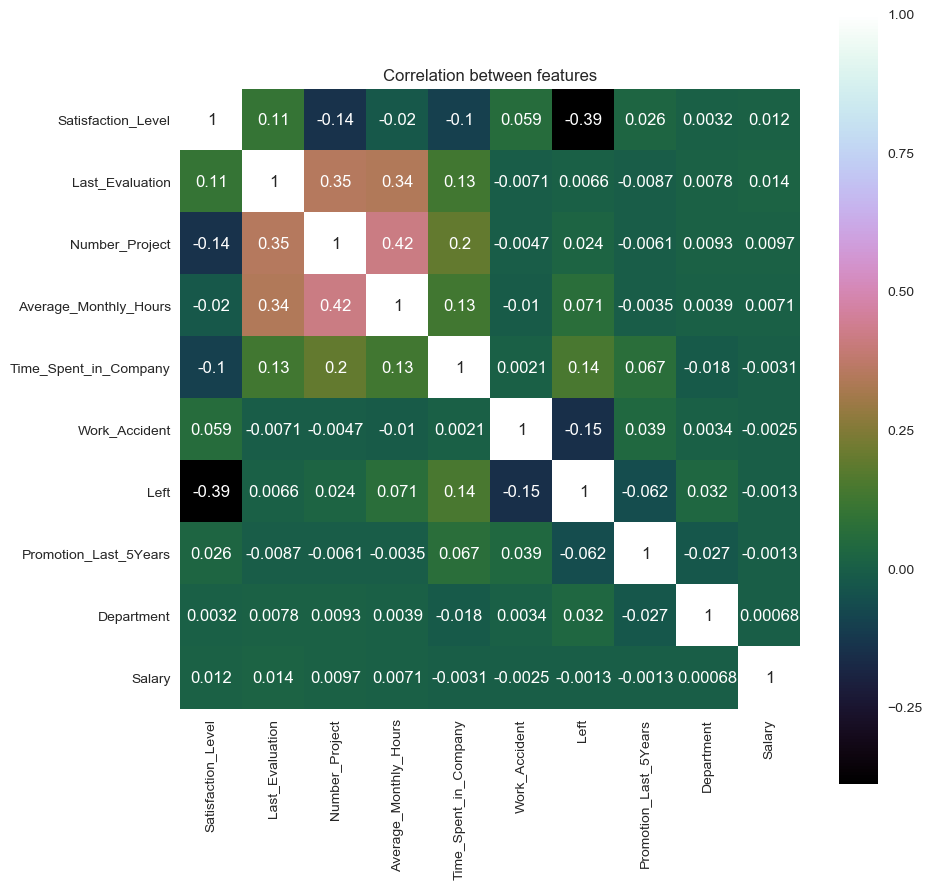

In [58]:
sns.set(font_scale=1)
corr=dataset.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, vmax=1, square=True,annot=True,cmap='cubehelix')
plt.title('Correlation between features')

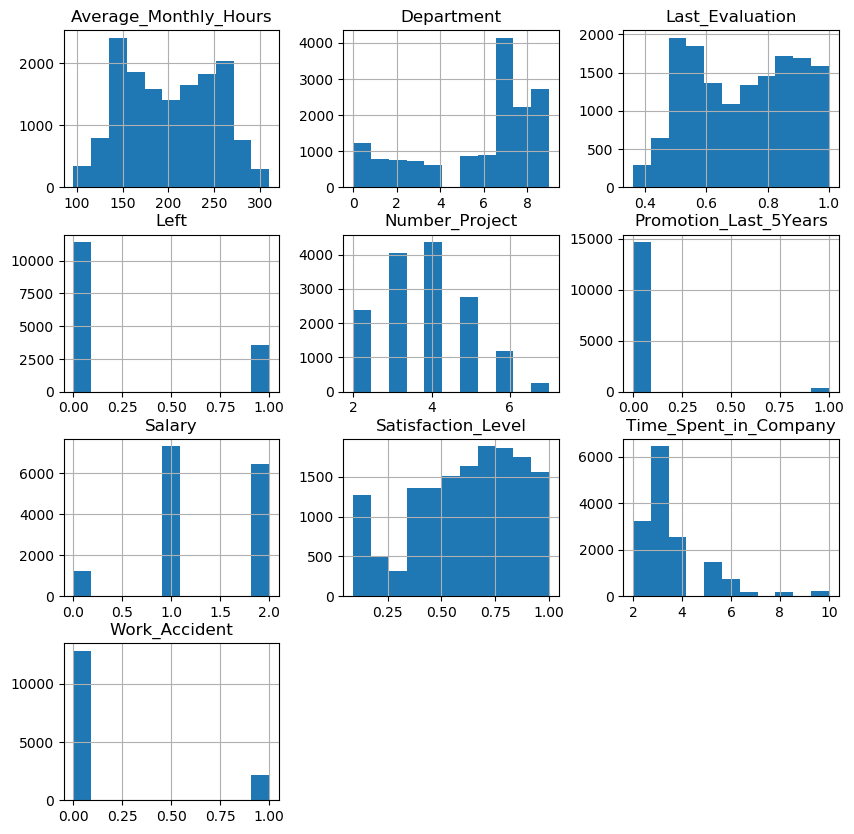

In [59]:
plt.style.use(style = 'default')
dataset.hist(bins=11,figsize=(10,10),grid=True)
plt.show()

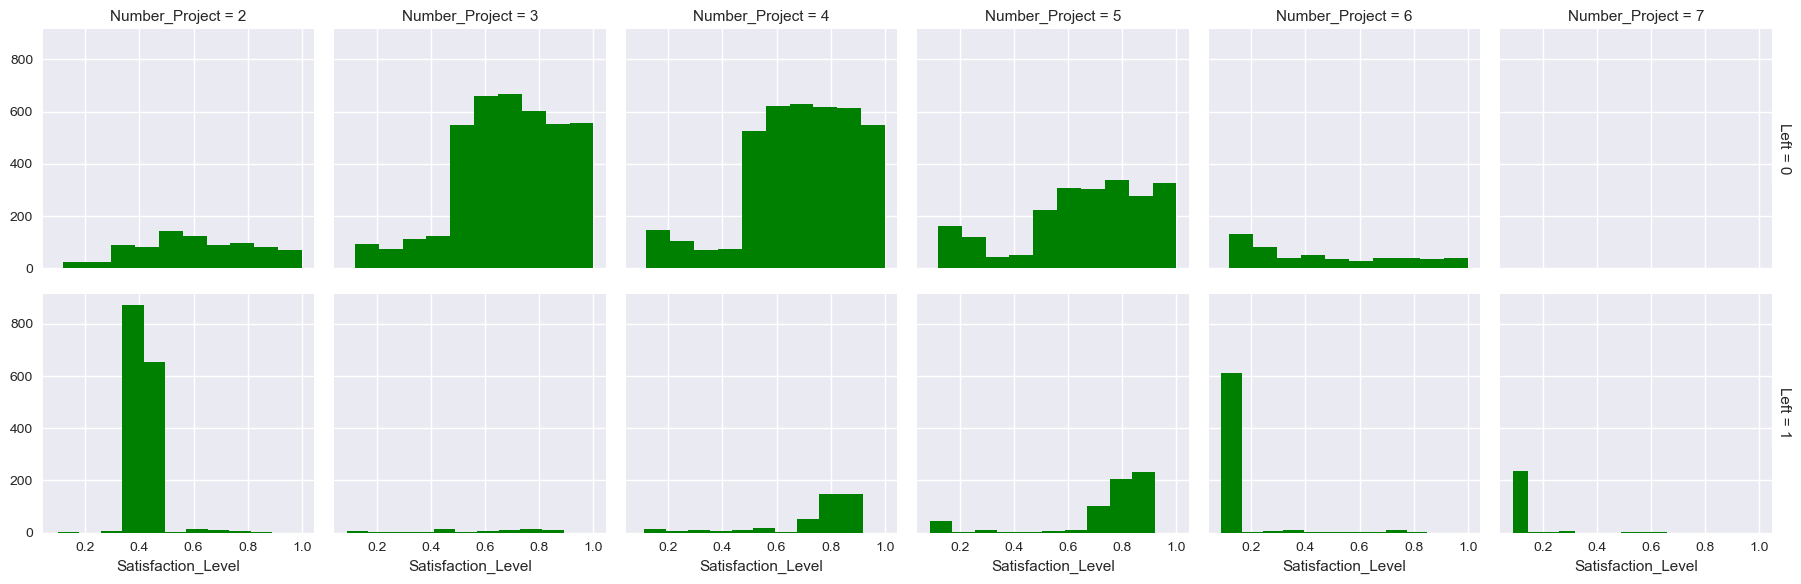

In [61]:
sns.set(font_scale=1)
g = sns.FacetGrid(dataset, col="Number_Project", row="Left", margin_titles=True)
g.map(plt.hist, "Satisfaction_Level",color="green")

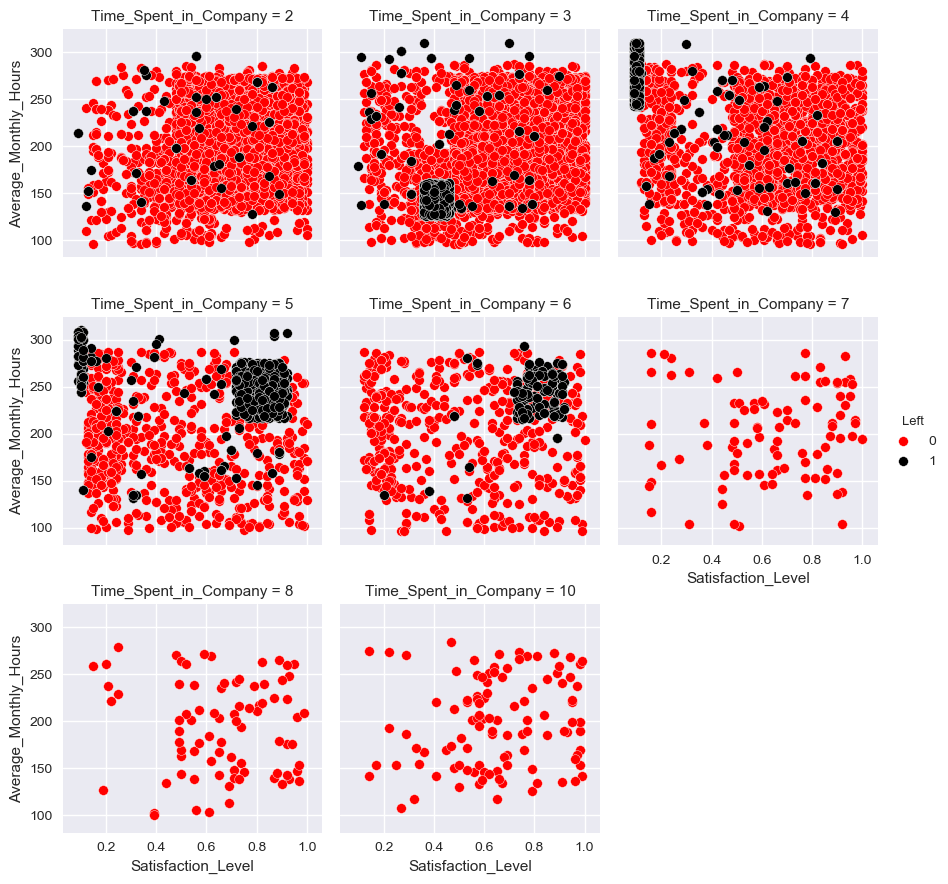

In [62]:
g = sns.FacetGrid(dataset, hue="Left", col="Time_Spent_in_Company", 
                  margin_titles=True, 
                  palette={1:"black", 0:"red"}, col_wrap=3)
g=g.map(plt.scatter, "Satisfaction_Level", "Average_Monthly_Hours",
        edgecolor="w").add_legend()


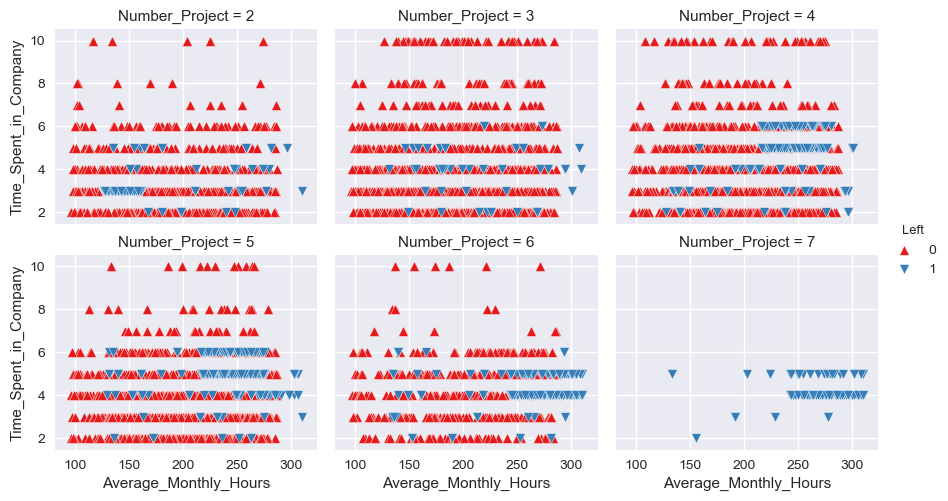

In [64]:
g = sns.FacetGrid(dataset, hue="Left", col="Number_Project", margin_titles=True,
                  palette="Set1", hue_kws=dict(marker=["^", "v"]), col_wrap=3)
g.map(plt.scatter, "Average_Monthly_Hours", "Time_Spent_in_Company",
      edgecolor="w").add_legend()
plt.subplots_adjust(top=0.8)

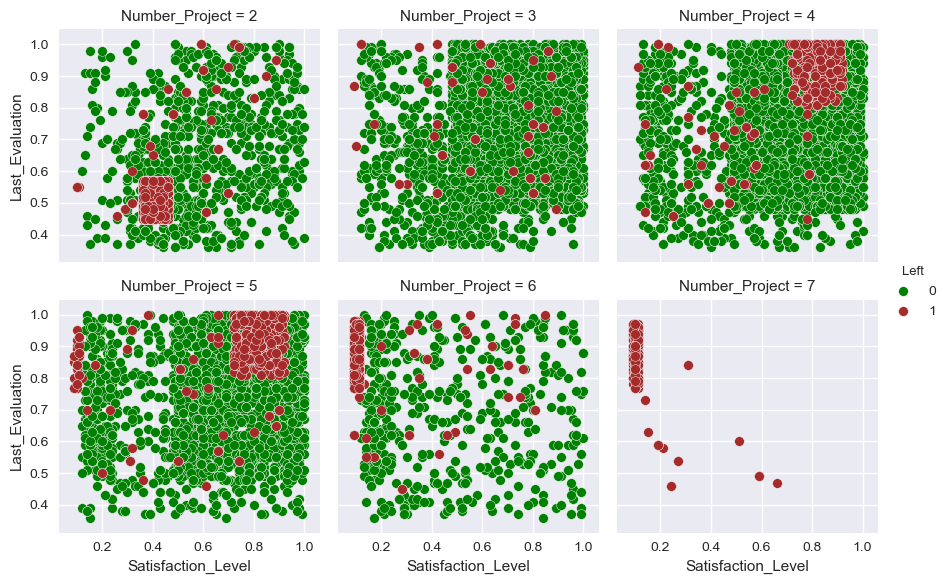

In [65]:
g = sns.FacetGrid(dataset, hue="Left", col="Number_Project", margin_titles=True,
                  palette={1:"brown", 0:"green"}, col_wrap=3)
g=g.map(plt.scatter, "Satisfaction_Level", "Last_Evaluation",
        edgecolor="w").add_legend()

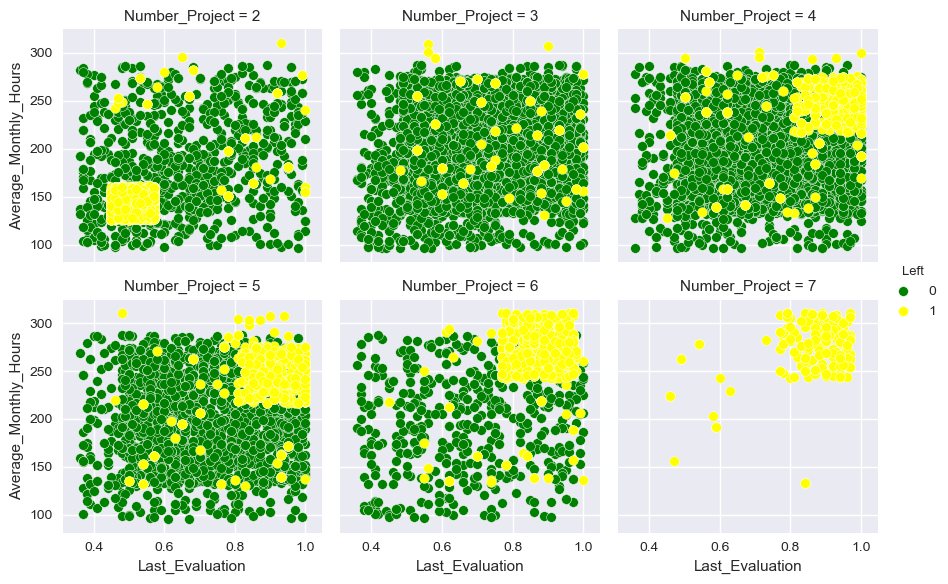

In [67]:
g = sns.FacetGrid(dataset, hue="Left", col="Number_Project",
                  margin_titles=True,
                  palette={1:"yellow", 0:"green"}, col_wrap=3)
g=g.map(plt.scatter, "Last_Evaluation", "Average_Monthly_Hours",
        edgecolor="w").add_legend()

In [46]:
#Encoding categorical data
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelEnc=LabelEncoder()

cat_vars=["Department","Salary","Work_Accident"]
for col in cat_vars:
    dataset[col]=labelEnc.fit_transform(dataset[col])

#after categorical encoding
X = dataset.iloc[:,[0,1,2,3,4,5,7,8,9]].values
onehotencoder = OneHotEncoder(categorical_features = [[5],[7],[8]])
X = onehotencoder.fit_transform(X).toarray()

In [47]:
X = dataset.iloc[:,[0,1,2,3,4,5,7,8,9]].values
y = dataset.iloc[:,6].values


In [48]:
#splitting the dataset into training set and test set
#Splitting 75%:25%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state
= 0)
#Applying feature scaling to the dataset
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
from sklearn.metrics import accuracy_score

In [53]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier as dt
classifier = dt(criterion='entropy',random_state=0)
classifier.fit(X_train,y_train)
#Predicting the results
y_pred=classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print"Accuracy Score and Confusion Matrix for Decision Tree Classifier"
print"Accuracy Score for Decision Tree Classifier:",accuracy_score(y_test,y_pred)
print"Confusion Matrix for Decision Tree Classifier\n",cm

Accuracy Score and Confusion Matrix for Decision Tree Classifier
Accuracy Score for Decision Tree Classifier: 0.9584
Confusion Matrix for Decision Tree Classifier
[[2837   44]
 [ 112  757]]


In [54]:
#random forest classification
from sklearn.ensemble import RandomForestClassifier as rfc
#for 5 Trees in forest
classifier=rfc(n_estimators=10,criterion='entropy',random_state=0)
classifier.fit(X_train,y_train)
#Predicting the results
y_pred=classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print"Accuracy Score and Confusion Matrix for Random Forest Classifier"
print"Accuracy Score for Random Forest Classifier:",accuracy_score(y_test,y_pred)
print"Confusion Matrix for Random Forest Classifier\n",cm

Accuracy Score and Confusion Matrix for Random Forest Classifier
Accuracy Score for Random Forest Classifier: 0.9586666666666667
Confusion Matrix for Random Forest Classifier
[[2873    8]
 [ 147  722]]


In [52]:
#Naive bayes
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(X_train,y_train)
#Predicting the test results
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print"Accuracy Score and Confusion Matrix for Naive Bayes"
print"Accuracy Score for Naive Bayes:",accuracy_score(y_test,y_pred)
print"Confusion Matrix for Naive Bayes\n",cm


Accuracy Score and Confusion Matrix for Naive Bayes
Accuracy Score for Naive Bayes: 0.8037333333333333
Confusion Matrix for Naive Bayes
[[2360  521]
 [ 215  654]]


In [51]:
#SVM
from sklearn.svm import SVC
classifier = SVC(kernel='linear',random_state=0)
classifier.fit(X_train, y_train)
#Predicting the results
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print"Accuracy Score and Confusion Matrix for Support Vector Machines"
print"Accuracy Score for SVM:",accuracy_score(y_test,y_pred)
print"Confusion Matrix for SVM\n",cm

Accuracy Score and Confusion Matrix for Support Vector Machines
Accuracy Score for SVM: 0.7808
Confusion Matrix for SVM
[[2710  171]
 [ 651  218]]


In [50]:
#KNN algorithm
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski',p=2)
classifier.fit(X_train, y_train)
#Predicting the results
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print"Accuracy Score and Confusion Matrix for KNearest Neighbors"
print"Accuracy Score for KNN:",accuracy_score(y_test,y_pred)
print"Confusion Matrix for KNN\n",cm

Accuracy Score and Confusion Matrix for KNearest Neighbors
Accuracy Score for KNN: 0.9544
Confusion Matrix for KNN
[[2778  103]
 [  68  801]]


In [49]:
#logistic regression model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train,y_train)
#Predicting the test result
y_pred = classifier.predict(X_test)
#making confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print"Accuracy Score and Confusion Matrix for Logistic Regression"
print"Accuracy Score for Logistic Regression:",accuracy_score(y_test, y_pred)
print"Confusion Matrix for Logistic Regression\n",cm

Accuracy Score and Confusion Matrix for Logistic Regression
Accuracy Score for Logistic Regression: 0.7648
Confusion Matrix for Logistic Regression
[[2648  233]
 [ 649  220]]


#Comparing different Machine Learning models and cross validating them.

LR: 0.748236 (0.240326)
KNN: 0.925063 (0.021160)
CART: 0.979867 (0.014790)
NB: 0.774386 (0.043260)
SVM: 0.945730 (0.028706)
RFC: 0.991200 (0.013094)


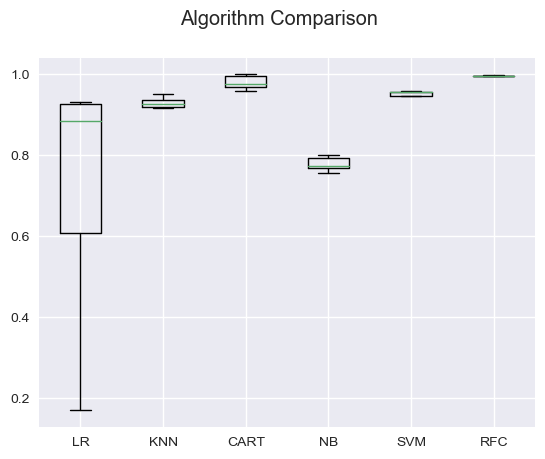

In [55]:
#Comparing different Machine Learning models and cross validating them
print"#Comparing different Machine Learning models and cross validating them.\n"
# Compare Algorithms
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
# load dataset
#dataset = pandas.read_csv('HR_Data.csv')
array = dataset.values
X = dataset.iloc[:,[0,1,2,3,4,5,7,8,9]].values
y = dataset.iloc[:,6].values
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RFC', RandomForestClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, 
                                                 scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

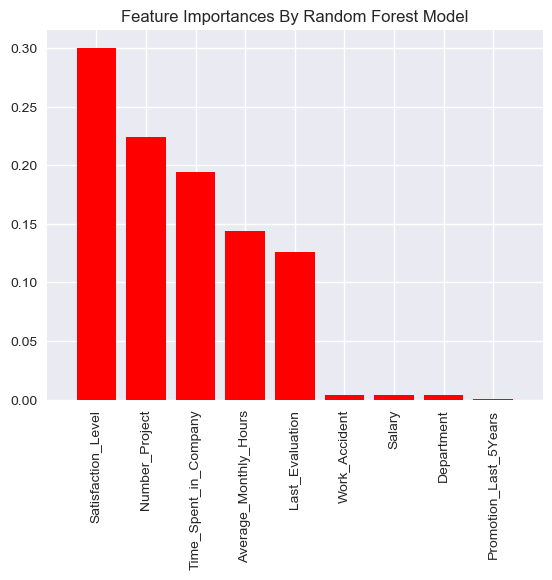

In [56]:

from sklearn.ensemble import RandomForestClassifier
predictors = ["Satisfaction_Level", "Last_Evaluation", "Number_Project",
              "Average_Monthly_Hours","Time_Spent_in_Company",
              "Work_Accident", "Promotion_Last_5Years", "Department","Salary"]
rf = RandomForestClassifier(random_state=1, n_estimators=50, max_depth=9,
                            min_samples_split=6, min_samples_leaf=4)
rf.fit(dataset[predictors],dataset["Left"])
importances=rf.feature_importances_
std = np.std([rf.feature_importances_ for tree in rf.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
sorted_important_features=[]
for i in indices:
    sorted_important_features.append(predictors[i])
plt.figure()
plt.title("Feature Importances By Random Forest Model")
plt.bar(range(np.size(predictors)), importances[indices],color="r",
        yerr=std[indices], align="center")
plt.xticks(range(np.size(predictors)), sorted_important_features,
           rotation='vertical')
plt.xlim([-1, np.size(predictors)])
plt.show()